In [45]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("India Agriculture Crop Production.csv")
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [47]:
df.describe()

,Area,Production,Yield
count,3.453740e+05,3.404140e+05,345374.000000
mean,1.167019e+04,9.583711e+05,79.407569
std,4.583843e+04,2.152986e+07,916.628744
min,4.000000e-03,0.000000e+00,0.000000
25%,7.400000e+01,8.700000e+01,0.546742
50%,5.320000e+02,7.170000e+02,1.000000
75%,4.110000e+03,7.176000e+03,2.467080
max,8.580100e+06,1.597800e+09,43958.333333


In [48]:
# Extract start year
df['Year'] = df['Year'].str[:4].astype(int)

In [49]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [50]:
# checking null values
print(df.isnull().sum())

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64


In [51]:
# Replace missing categorical values with 'Unknown'
cat_cols = ['State', 'District', 'Crop', 'Season', 'Area Units', 'Production Units']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

In [52]:
# Replace missing numerical values with median
num_cols = ['Area', 'Production', 'Yield']
for col in num_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [53]:
df.isna().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [54]:
# checking for duplicate values 
df.duplicated().sum()

0

In [55]:
# checking for outliers 
df.boxplot()

<Axes: >

In [56]:
# treating outliers 
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme, upper_extreme


def outlier_treatment(data, colname):
    lower, upper = outlier_detection(data, colname)
    data[colname] = data[colname].clip(lower, upper)
    
    print(f"{colname} outliers are treated !!!")

In [57]:
outlier_treatment(df, 'Area')
outlier_treatment(df, 'Production')
outlier_treatment(df, 'Yield')

Area outliers are treated !!!
Production outliers are treated !!!
Yield outliers are treated !!!


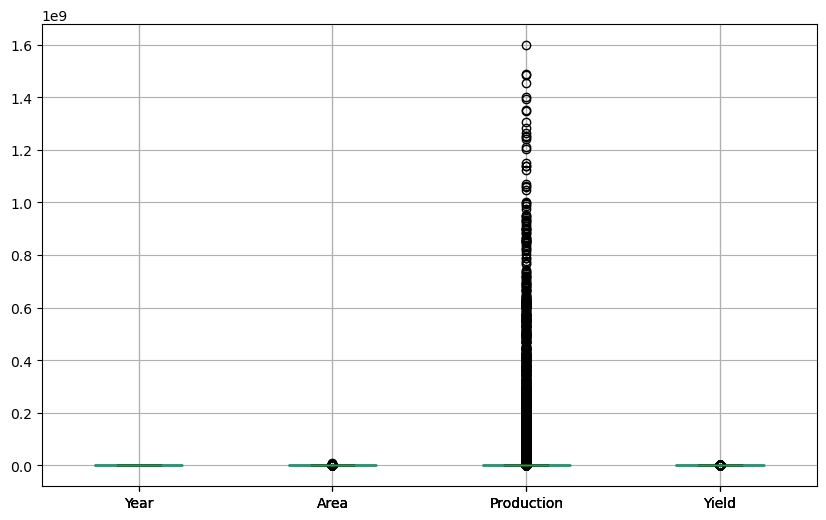

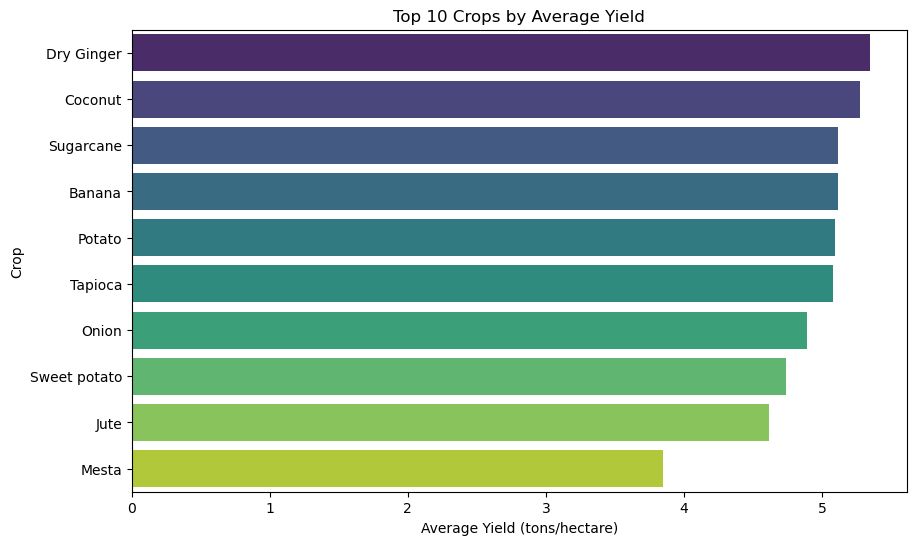

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average Yield by Crop (Top 10 crops)
top_crops = df.groupby("Crop")["Yield"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.xlabel("Average Yield (tons/hectare)")
plt.ylabel("Crop")
plt.title("Top 10 Crops by Average Yield")
plt.show()

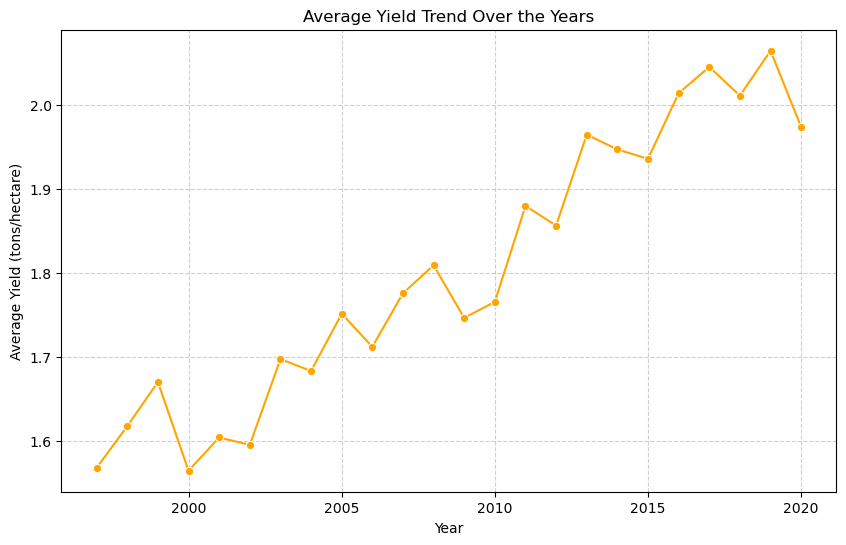

In [59]:
# Yield trend over Years
yearly_yield = df.groupby("Year")["Yield"].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_yield.index, y=yearly_yield.values, marker="o", color="orange")
plt.xlabel("Year")
plt.ylabel("Average Yield (tons/hectare)")
plt.title("Average Yield Trend Over the Years")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [60]:
# Encoding the categorical columns 
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_encoded = df.copy()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

In [61]:
# Scaling numerical columns

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [62]:
print(df_encoded.head())
print(df_encoded.describe())

   State  District  Crop  Year  Season      Area  Area Units  Production  \
0      0       481     0  2001       1 -0.386090           0   -0.381493   
1      0       481     0  2002       5 -0.385043           0   -0.378150   
2      0       481     0  2003       5 -0.384257           0   -0.462941   
3      0       485     0  2001       1  0.097128           0    0.101422   
4      0       627     0  2002       5  0.098437           0    0.105677   

   Production Units     Yield  
0                 2 -0.097594  
1                 2 -0.090612  
2                 2 -0.344823  
3                 2 -0.071140  
4                 2 -0.067555  
               State       District           Crop           Year  \
count  345407.000000  345407.000000  345407.000000  345407.000000   
mean       19.108293     352.126002      30.094153    2008.888097   
std        10.951944     211.231794      15.832861       6.564755   
min         0.000000       0.000000       0.000000    1997.000000   
25%   

In [63]:
ts_data = df_encoded.groupby(['Year', 'State', 'Crop'])[['Production', 'Yield']].mean().reset_index()

print(ts_data.head())

   Year  State  Crop  Production     Yield
0  1997      1     1   -0.373878 -0.892065
1  1997      1     2   -0.126180 -0.568713
2  1997      1     8   -0.200849 -0.895394
3  1997      1    11    1.508413 -0.097926
4  1997      1    14    0.182654  0.020528


In [64]:
crop = 'Wheat'  
state = 'Punjab'  

ts_crop_state = ts_data[(ts_data['Crop'] == label_encoders['Crop'].transform([crop])[0]) & 
                        (ts_data['State'] == label_encoders['State'].transform([state])[0])]

# Sort by year
ts_crop_state = ts_crop_state.sort_values('Year')

print(ts_crop_state)

       Year  State  Crop  Production     Yield
268    1997     27    55    1.918585  1.119474
786    1998     27    55    1.918585  1.414314
1435   1999     27    55    1.918585  1.614913
2164   2000     27    55    1.918585  1.530696
2924   2001     27    55    1.918585  1.521958
3686   2002     27    55    1.918585  1.318101
4466   2003     27    55    1.918585  1.338515
5206   2004     27    55    1.918585  1.345453
5973   2005     27    55    1.918585  1.327730
6739   2006     27    55    1.918585  1.329083
7504   2007     27    55    1.918585  1.515407
8283   2008     27    55    1.918585  1.470942
9069   2009     27    55    1.918585  1.426900
9868   2010     27    55    1.918585  1.614203
10658  2011     27    55    1.918585  1.840569
11481  2012     27    55    1.918585  1.629926
12259  2013     27    55    1.918585  1.773679
13093  2014     27    55    1.918585  1.343826
13951  2015     27    55    1.918585  1.558321
14838  2016     27    55    1.918585  1.790482
15743  2017  

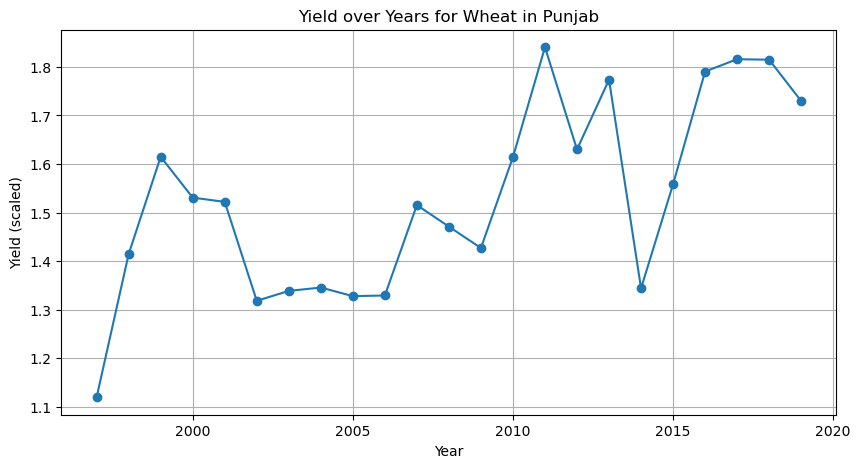

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ts_crop_state['Year'], ts_crop_state['Yield'], marker='o')
plt.title(f'Yield over Years for {crop} in {state}')
plt.xlabel('Year')
plt.ylabel('Yield (scaled)')
plt.grid(True)
plt.show()

In [66]:
# building time series model (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

# Use the yield series as the time series
yield_series = ts_crop_state.set_index('Year')['Yield']

model = ARIMA(yield_series, order=(1,1,1))

In [67]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Yield   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   8.572
Date:                Tue, 12 Aug 2025   AIC                            -11.144
Time:                        19:43:31   BIC                             -7.870
Sample:                             0   HQIC                           -10.372
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4234      0.563      0.752      0.452      -0.680       1.527
ma.L1         -0.7700      0.381     -2.019      0.043      -1.518      -0.022
sigma2         0.0265      0.010      2.698      0.0

In [68]:
# Forecast next 5 years
forecast = model_fit.forecast(steps=5)
print(forecast)

23    1.716843
24    1.711381
25    1.709068
26    1.708089
27    1.707675
Name: predicted_mean, dtype: float64


In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual = yield_series[-forecast_steps:]  # last n points of actual data (if available)
predicted = model_fit.predict(start=actual.index[0], end=actual.index[-1])

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 0.0941
RMSE: 0.1029
MAPE: 5.48%


In [70]:
# evaluating 
# Forecasting the next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

In [71]:
# Preparing data for plotting
# Actual values (existing data)
actual_years = yield_series.index
actual_values = yield_series.values

In [72]:
# Forecasted values (future years)
last_year = actual_years[-1]
forecast_years = [last_year + i for i in range(1, forecast_steps + 1)]
forecast_values = forecast.values if hasattr(forecast, 'values') else forecast

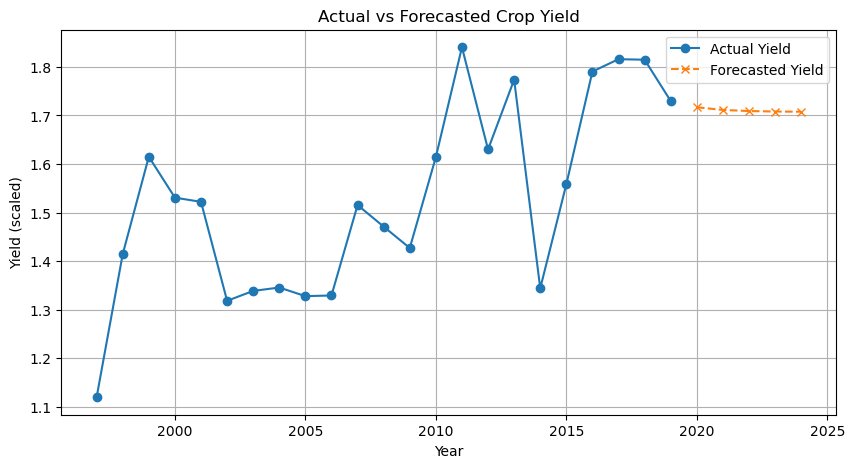

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(actual_years, actual_values, label='Actual Yield', marker='o')
plt.plot(forecast_years, forecast_values, label='Forecasted Yield', marker='x', linestyle='--')

plt.title('Actual vs Forecasted Crop Yield')
plt.xlabel('Year')
plt.ylabel('Yield (scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
forecast_years, forecast_values

([2020, 2021, 2022, 2023, 2024],
 array([1.71684285, 1.7113807 , 1.70906826, 1.70808927, 1.7076748 ]))